In [1]:

# Requirements: Matplotlib, Numpy, functions_util.py, index.py#, fitting_functions_ZNE.py, h5py

import os

#Move the directory back to Duke_Data
#Check if the current directory is Duke_Data
if os.getcwd().split('/')[-1] != 'DUKE_ANALOG_ZNE_DATA':
    #os.chdir('Duke_Data')
    os.chdir('../')
    #print(os.getcwd().split('/')[-1])
    #pass
else:
    pass

import sys
sys.path.insert(0, './scripts')
sys.path.insert(1, './')
sys.path.insert(2, './util')


#print(os.getcwd())
from util.index import print_index, get_experiment, index_folder
from util.functions_util import cetina_thermal_exp, cetina_envelope_exp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
import numpy as np
from util.samplers_util import thermal_rejection

import h5py
from util.fitting_functions_ZNE import linear_ZNE, third_no_first_ZNE


def fit(function, x_axis, y_axis, return_cov=False, p0=[.05,2000000], weights=None):
    # Fit the data to the function
    popt, pcov = curve_fit(function, x_axis, y_axis, p0=p0, sigma=weights, absolute_sigma=True, maxfev=10000)
    
    if return_cov:
        return popt, pcov
    return popt

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
# import all the useful lib in python
from matplotlib import artist as art
%matplotlib inline
import scipy as sp
# import pandas as pd
import pathlib
import os
import datetime as dt
import glob
from IPython.display import clear_output
from numpy.fft import fft, ifft

from util.h5analysis import *
from util.qsim_functions import*


In [145]:

#pairs = [(11,12), (12,13),(13,14)]
#bases = ['x', 'y', 'z']
#pairs_names = [265, 259, 266]
# basis_names = [268, 271, 269]
# foldername = 'Population_4_tw0'
# pairs_names = [str(name) for name in pairs_names]
# qubits = [11,12,13,14]
# shots = 150


# foldername = 'Population_dense'
# #bases = ['x0', 'y0','x1','y1']
# bases = ['x0', 'x1', 'y0', 'y1']
# qubits = [11,12,13,14]
# basis_names = [368, 369, 370, 371] 
# shots = 600

foldername = '15_ion_4_qubit_time_scan'
#bases = ['x0', 'y0','x1','y1']
# 4 qubit, 15 ions
#B = 4, B = 6
bases = ['x0', 'y0', 'x1', 'y1']
qubits = [2,3,4,5]#,6,7]
basis_names = [558, 559, 561, 560] 
shots = 600
data_prefix = '000572'
J = 0.53*np.pi
B = 4*J
theta_0_noise = 0.055
xrate = np.sqrt(0.015)*J
#zrate = np.sqrt(0.15)*J
zrate = 0

# foldername = '27_chain_4_XY'
# #bases = ['x0', 'y0','x1','y1']
# # 4 qubit, 15 ions
# #B = 4, B = 6
# bases = ['x0', 'y0', 'x1', 'y1']
# qubits = [13,14,15,16]#,6,7]
# basis_names = [701, 702, 704, 703] 
# shots = 600
# data_prefix = '000572'
# J = 0.56*np.pi
# B = 6*J
# index_experiment = [2,3]
# theta_0_noise = 0.15
# xrate = np.sqrt(0.08)*J
#zrate = np.sqrt(0.15)*J
#zrate = np.sqrt(0.055)*J




basis_names = [str(name) for name in basis_names]
for name_index in range(len(basis_names)):
    name = basis_names[name_index]
    if data_prefix in basis_names:
        pass
    else:
        name = data_prefix + name
        basis_names[name_index] = name
full_data_folder_path = './data/' + foldername + '/'


In [146]:
COUNTS_THRESHOLD = 1


In [147]:
# leakage_matrix = np.zeros((30, len(pairs_names)))
# flopping_matrix = np.zeros((30, len(pairs_names)))
# flopping_std_matrix = np.zeros((30, len(pairs_names)))
# times = None


# print(os.getcwd())
# for file_id_index in range(len(pairs_names)):
#     file_id = pairs_names[file_id_index]
#     pair = pairs[file_id_index]
#     #pair = names[0]
#     file = h5py.File(full_data_folder_path + file_id + '-RFSoCSequence.h5', 'r')
#     archive = file['archive']
#     dataset = file['datasets']
#     x_vals = dataset['data.rfsoc_pulse_sequence.x_values']
#     times = np.array(x_vals)
#     print(times)
#     raw_counts = dataset['data.rfsoc_pulse_sequence.raw_counts']
#     counts = np.asarray(raw_counts)
#     print(counts.shape)
#     measurements = np.zeros((2, shots, 30))
#     for pair_index in range(len(pair)):
#         qubit = pair[pair_index]
#         measurements[pair_index,:,:] = 1 < counts[qubit,:,:]
#         #print(measurements)
#     #Convert the measurements to bitstrings. Convert to string, then append the like indices
#     counts_bitstrings = np.zeros((shots, 30), dtype='<U5')
#     expectations = np.zeros((shots, 30))
#     for i in range(shots):
#         for j in range(30):
#             expectation = ((measurements[0,i,j]*2-1) - (measurements[1,i,j]*2-1))/2
#             bitstring = str(int(measurements[0,i,j])) + str(int(measurements[1,i,j]))
#             #print(bitstring)
#             counts_bitstrings[i,j] = bitstring
#             expectations[i,j] = expectation
#     #average expectations across the 150 axis:
#     expectations_avg = np.mean(expectations, axis=0)
#     #Convert counts_bitstrings to a dictionary of counts
#     print(counts_bitstrings)
#     counts_array  = np.zeros((30,), dtype=dict)
#     for i in range(30):
#         counts_array[i] = {}
#         for j in range(shots):
#             if counts_bitstrings[j,i] in counts_array[i]:
#                 counts_array[i][counts_bitstrings[j,i]] += 1
#             else:
#                 counts_array[i][counts_bitstrings[j,i]] = 1
                
#     leakage = np.zeros((30,))
#     for i in range(30):
#         if '00' in counts_array[i]:
#             leakage[i] = counts_array[i]['00']/shots
#         if '11' in counts_array[i]:
#             leakage[i] += counts_array[i]['11']/shots
#     leakage_conv = np.zeros((30,))
#     for i in range(30):
#         leakage_conv[i] = np.mean(leakage[i:i+4])
#     leakage_matrix[:,file_id_index] = leakage_conv
#     flopping_matrix[:,file_id_index] = expectations_avg
#     flopping_std = np.std(expectations, axis=0)
#     flopping_std_matrix[:,file_id_index] = flopping_std
    
# #print(counts_array)

In [148]:
# cmap = cm.get_cmap('viridis')
# fig = plt.figure()
    
# def exp_fit(x, b, c):
#     return np.exp(-b*x)*np.cos(2*c*x)
# gammas = np.zeros((len(pairs_names),))
# for name_index in range(len(pairs_names)):
#     popt, pcov = curve_fit(exp_fit, times, flopping_matrix[:,name_index], p0=[0.05, 2*np.pi])
#     gammas[name_index] = popt[0]
#     color = cmap(name_index/len(pairs_names))
#     plt.plot(times, 1-leakage_matrix[:,name_index], label = pairs[name_index], color=color)
#     plt.plot(times, -1+leakage_matrix[:,name_index], color=color)
#     print(popt[1])
#     plt.errorbar(times, flopping_matrix[:,name_index], yerr = flopping_std_matrix[:,name_index]/np.sqrt(150), color=color)
# print(gammas)



# #make it bigger:
# fig.set_size_inches(10, 6)
# plt.legend()

In [149]:
measurement_data = np.zeros((30, len(basis_names)), dtype=dict)
#flopping_matrix = np.zeros((30, len(pairs_names)))
#flopping_std_matrix = np.zeros((30, len(pairs_names)))
#times = None
times_start = None
times_end = None
all_good_strings = ['0000', '1111']#, '0001', '0010', '0100', '1000', '1110', '1101', '1011', '0111']
expectations_matrix = np.zeros((30,len(basis_names)))
qubit_0_magnetization = np.zeros((30,len(basis_names)))
leakage_factor = np.zeros((30,len(basis_names)))

print(os.getcwd())
for file_id_index in range(len(basis_names)):
    
    file_id = basis_names[file_id_index]
    axis = bases[file_id_index]
    #pair = names[0]
    file = h5py.File(full_data_folder_path + file_id + '-RFSoCSequence.h5', 'r')
    archive = file['archive']
    dataset = file['datasets']
    x_vals = dataset['data.rfsoc_pulse_sequence.x_values']
    times = np.array(x_vals)
    if file_id_index == 0:
        times_start = times
    if file_id_index == 3:
        times_end = times
    #print(times)
    raw_counts = dataset['data.rfsoc_pulse_sequence.raw_counts']
    counts = np.asarray(raw_counts)
    print(counts[:,0,0])
    for i in range(len(qubits)):
        print(counts[qubits[i],0,:])
    measurements = np.zeros((len(qubits), shots, 30))
    for qubit_index in range(len(qubits)):
        qubit = qubits[qubit_index]
        #qubit = pair[pair_index]
        measurements[qubit_index,:,:] = 1 < counts[qubit,:,:]
        #print(measurements)
    #Convert the measurements to bitstrings. Convert to string, then append the like indices
    counts_bitstrings = np.zeros((shots, 30), dtype='<U5')
    for i in range(shots):
        for j in range(30):
            bitstring = [str(int(measurements[qubit_index,i,j])) for qubit_index in range(len(qubits))]
            bitstring = "".join(bitstring)
            
            #print(measurements[:,i,j])
            #print(bitstring)
            #str(int(measurements[0,i,j])) + str(int(measurements[1,i,j]))
            #print(bitstring)
            counts_bitstrings[i,j] = bitstring
    counts_dicts = np.zeros(30, dtype=dict)
    for j in range(30):
        magnetization = 0
        for shot_index in range(shots):
            magnetization += measurements[0, shot_index, j]*2 - 1
        qubit_0_magnetization[j,file_id_index] = magnetization/shots
        temp_dict = {}#
        for string in all_good_strings:
            temp_dict[string] = 0
        #{'0000':0, '1111':0}
        for i in range(shots):
            if counts_bitstrings[i,j] in temp_dict:
                temp_dict[counts_bitstrings[i,j]] += 1/shots
            else:
                temp_dict[counts_bitstrings[i,j]] = 1/shots
        counts_dicts[j] = temp_dict
        expectation = 0
        for key in temp_dict.keys():
            if key not in all_good_strings:
                leakage_factor[j,file_id_index] += temp_dict[key]/shots
            #count the number of zeros. If it is even, add the value. If it is odd, subtract the value
            num_zeros = key.count('0')
            if num_zeros % 2 == 0:
                expectation += temp_dict[key]
            else:
                expectation -= temp_dict[key]
        expectations_matrix[j,file_id_index] = expectation
    measurement_data[:,file_id_index] = counts_dicts
    

    
#print(counts_array)

/Users/thomassteckmann/Duke_Analog_ZNE_data
[ 0.  0.  8. 16. 13. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 8.  0.  0.  0.  0.  0.  0. 10.  8.  0.  0.  0. 11.  0.  0.  0. 12.  0.
  0. 12.  0.  9.  0.  6.  0.  9.  0.  0.  6. 10.]
[16. 10.  0.  0.  0.  0.  0. 10.  9. 13.  0.  0. 11.  0.  0.  8.  0.  0.
  0.  0. 15. 10. 11.  0.  6. 12.  0.  0.  7. 10.]
[13. 11.  0.  8.  0.  0. 17.  5. 12. 11.  0.  0.  0.  0.  0.  0.  7.  0.
  0.  0. 12. 12. 11.  0. 11. 13.  0.  0.  7. 10.]
[10. 10. 11.  0.  0.  0. 11.  8.  0.  0.  0.  0. 10.  0.  0.  0.  9.  0.
 11.  9.  0. 12.  0.  0.  7.  7.  0.  0.  0. 13.]
[0. 0. 9. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 9.  9.  0.  6. 10.  0.  0.  0.  9.  0. 10.  4.  0.  0.  0. 10.  0.  0.
  4.  0.  0.  0.  0.  3. 13.  0. 11.  3.  8.  0.]
[ 2. 10.  0.  0.  7.  0.  0.  0. 12. 14. 13. 13.  0.  0. 11.  7.  0.  0.
  8.  0.  0. 12.  8.  9.  5.  6.  5.  0.  3.  0.]
[ 0. 14. 14.  8.  0.  0.  0.  0.  9.  9. 12.  8. 16.  0.  5.  0.  0. 11.
  8.  0.  0.  0. 15.  0. 10. 15.  8.

In [150]:
print(measurement_data[:,2])

[{'0000': 0.0016666666666666668, '1111': 0.935000000000008, '1011': 0.005, '0111': 0.04166666666666665, '1101': 0.006666666666666667, '1110': 0.0033333333333333335, '1100': 0.0016666666666666668, '0011': 0.0033333333333333335, '0001': 0.0016666666666666668}
 {'0000': 0.028333333333333335, '1111': 0.17000000000000012, '1010': 0.05166666666666663, '1110': 0.0899999999999999, '0011': 0.06166666666666661, '0111': 0.10499999999999987, '1011': 0.07999999999999992, '1001': 0.05666666666666662, '0101': 0.05999999999999995, '0110': 0.05166666666666663, '1101': 0.08333333333333325, '0100': 0.028333333333333335, '0001': 0.03166666666666667, '1000': 0.023333333333333334, '1100': 0.04999999999999997, '0010': 0.028333333333333335}
 {'0000': 0.686666666666669, '1111': 0, '0001': 0.05666666666666662, '0010': 0.058333333333333286, '1000': 0.043333333333333314, '0011': 0.025, '1110': 0.0033333333333333335, '0100': 0.07833333333333325, '0111': 0.011666666666666667, '1100': 0.006666666666666667, '1001': 0

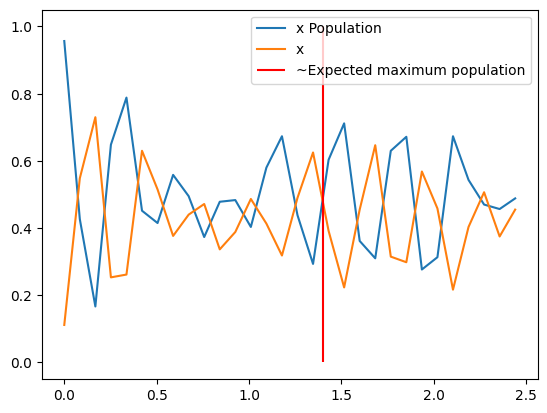

In [151]:
#get bitstrings for 0000, 1111, and one hamming distance from each:
Xpops = [sum([measurement_data[i,0][string] for string in all_good_strings]) for i in range(30)]
Ypops = [sum([measurement_data[i,1][string] for string in all_good_strings]) for i in range(30)]
comb_x_pop = np.concatenate((Xpops, Ypops))

#Xpops = [measurement_data[i,0]['0000'] + measurement_data[i,0]['1111'] for i in range(30)]
#Ypops = [measurement_data[i,1]['0000'] + measurement_data[i,1]['1111'] for i in range(30)]
Zpops = [measurement_data[i,2]['0000'] + measurement_data[i,2]['1111'] for i in range(30)]
plt.plot(times_start, Xpops, label = 'x Population')
plt.plot(times_end, Ypops, label = 'x')
plt.vlines(1.4, 0, 1, color='red', label='~Expected maximum population')
plt.legend()

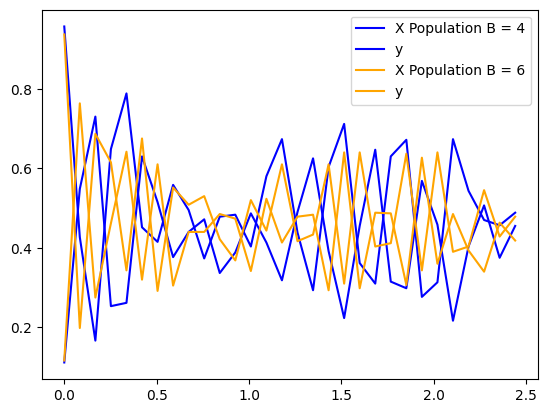

In [152]:
#get bitstrings for 0000, 1111, and one hamming distance from each:
Xpops = [sum([measurement_data[i,0][string] for string in all_good_strings]) for i in range(30)]
Ypops = [sum([measurement_data[i,1][string] for string in all_good_strings]) for i in range(30)]
comb_y_pop = np.concatenate((Ypops,Xpops))
times_comb = np.concatenate((times_start, times_end+1))
#Xpops = [measurement_data[i,0]['0000'] + measurement_data[i,0]['1111'] for i in range(30)]
#Ypops = [measurement_data[i,1]['0000'] + measurement_data[i,1]['1111'] for i in range(30)]
#Zpops = [measurement_data[i,2]['0000'] + measurement_data[i,2]['1111'] for i in range(30)]
plt.plot(times_end, Xpops, label = 'X Population B = 4', color='blue')
plt.plot(times_start, Ypops, label = 'y', color='blue')
#plt.vlines(1.4, 0, 1, color='red', label='~Expected maximum population')

#get bitstrings for 0000, 1111, and one hamming distance from each:
Xpops = [sum([measurement_data[i,2][string] for string in all_good_strings]) for i in range(30)]
Ypops = [sum([measurement_data[i,3][string] for string in all_good_strings]) for i in range(30)]
comb_y_pop = np.concatenate((Ypops,Xpops))
times_comb = np.concatenate((times_start, times_end+1))
#Xpops = [measurement_data[i,0]['0000'] + measurement_data[i,0]['1111'] for i in range(30)]
#Ypops = [measurement_data[i,1]['0000'] + measurement_data[i,1]['1111'] for i in range(30)]
#Zpops = [measurement_data[i,2]['0000'] + measurement_data[i,2]['1111'] for i in range(30)]
plt.plot(times_end, Xpops, label = 'X Population B = 6', color='orange')
plt.plot(times_start, Ypops, label = 'y', color='orange')
#plt.vlines(1.4, 0, 1, color='red', label='~Expected maximum population')
plt.legend()

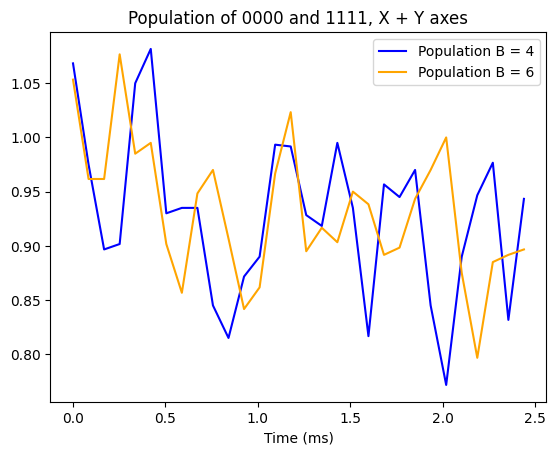

In [153]:
#get bitstrings for 0000, 1111, and one hamming distance from each:
Xpops = [sum([measurement_data[i,0][string] for string in all_good_strings]) for i in range(30)]
Ypops = [sum([measurement_data[i,1][string] for string in all_good_strings]) for i in range(30)]
comb_y_pop = np.concatenate((Ypops,Xpops))
times_comb = np.concatenate((times_start, times_end+1))
#Xpops = [measurement_data[i,0]['0000'] + measurement_data[i,0]['1111'] for i in range(30)]
#Ypops = [measurement_data[i,1]['0000'] + measurement_data[i,1]['1111'] for i in range(30)]
#Zpops = [measurement_data[i,2]['0000'] + measurement_data[i,2]['1111'] for i in range(30)]
plt.plot(times_end, np.array(Xpops)+np.array(Ypops), label = 'Population B = 4', color='blue')
#plt.plot(times_start, , label = 'y', color='blue')
#plt.vlines(1.4, 0, 1, color='red', label='~Expected maximum population')

#get bitstrings for 0000, 1111, and one hamming distance from each:
Xpops = [sum([measurement_data[i,2][string] for string in all_good_strings]) for i in range(30)]
Ypops = [sum([measurement_data[i,3][string] for string in all_good_strings]) for i in range(30)]
comb_y_pop = np.concatenate((Ypops,Xpops))
times_comb = np.concatenate((times_start, times_end+1))
#Xpops = [measurement_data[i,0]['0000'] + measurement_data[i,0]['1111'] for i in range(30)]
#Ypops = [measurement_data[i,1]['0000'] + measurement_data[i,1]['1111'] for i in range(30)]
#Zpops = [measurement_data[i,2]['0000'] + measurement_data[i,2]['1111'] for i in range(30)]
plt.plot(times_end, np.array(Xpops)+np.array(Ypops), label = 'Population B = 6', color='orange')
#plt.plot(times_start, Ypops, label = 'y', color='orange')
#plt.vlines(1.4, 0, 1, color='red', label='~Expected maximum population')
plt.legend()
plt.title('Population of 0000 and 1111, X + Y axes')
plt.xlabel('Time (ms)')
plt.savefig('data/'+foldername + '/Population_27_chain_4_XY_pop_sum.png')


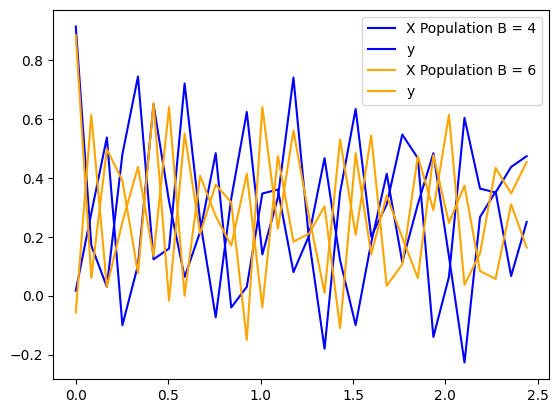

In [154]:
#get bitstrings for 0000, 1111, and one hamming distance from each:
Xpops = expectations_matrix[:,0]#[sum([expectations_matrix[i,0][string] for string in all_good_strings]) for i in range(30)]
Ypops = expectations_matrix[:,1]#[sum([expectations_matrix[i,1][string] for string in all_good_strings]) for i in range(30)]
comb_y_pop = np.concatenate((Ypops,Xpops))
times_comb = np.concatenate((times_start, times_end+1))
#Xpops = [measurement_data[i,0]['0000'] + measurement_data[i,0]['1111'] for i in range(30)]
#Ypops = [measurement_data[i,1]['0000'] + measurement_data[i,1]['1111'] for i in range(30)]
#Zpops = [measurement_data[i,2]['0000'] + measurement_data[i,2]['1111'] for i in range(30)]
plt.plot(times_end, Xpops, label = 'X Population B = 4', color='blue')
plt.plot(times_start, Ypops, label = 'y', color='blue')
#plt.vlines(1.4, 0, 1, color='red', label='~Expected maximum population')

#get bitstrings for 0000, 1111, and one hamming distance from each:
Xpops = expectations_matrix[:,2]#[sum([expectations_matrix[i,2][string] for string in all_good_strings]) for i in range(30)]
Ypops = expectations_matrix[:,3]#[sum([expectations_matrix[i,3][string] for string in all_good_strings]) for i in range(30)]
comb_y_pop = np.concatenate((Ypops,Xpops))
times_comb = np.concatenate((times_start, times_end+1))
#Xpops = [measurement_data[i,0]['0000'] + measurement_data[i,0]['1111'] for i in range(30)]
#Ypops = [measurement_data[i,1]['0000'] + measurement_data[i,1]['1111'] for i in range(30)]
#Zpops = [measurement_data[i,2]['0000'] + measurement_data[i,2]['1111'] for i in range(30)]
plt.plot(times_end, Xpops, label = 'X Population B = 6', color='orange')
plt.plot(times_start, Ypops, label = 'y', color='orange')
#plt.vlines(1.4, 0, 1, color='red', label='~Expected maximum population')
plt.legend()

(30, 4)


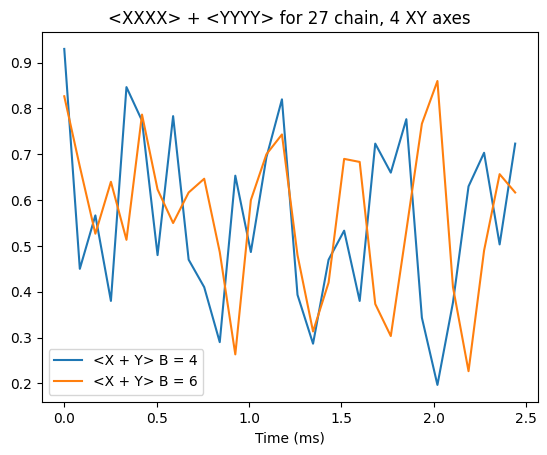

In [155]:
#get bitstrings for 0000, 1111, and one hamming distance from each:
Xpops = [sum([measurement_data[i,index_experiment[0]][string] for string in all_good_strings]) for i in range(30)]
Ypops = [sum([measurement_data[i,index_experiment[1]][string] for string in all_good_strings]) for i in range(30)]
#Xpops = [measurement_data[i,0]['0000'] + measurement_data[i,0]['1111'] for i in range(30)]
#Ypops = [measurement_data[i,1]['0000'] + measurement_data[i,1]['1111'] for i in range(30)]
Zpops = [measurement_data[i,2]['0000'] + measurement_data[i,2]['1111'] for i in range(30)]
print(expectations_matrix.shape)
plt.plot(times, expectations_matrix[:,0] + expectations_matrix[:,1], label = '<X + Y> B = 4')
plt.plot(times, expectations_matrix[:,2] + expectations_matrix[:,3], label = '<X + Y> B = 6')

plt.title('<XXXX> + <YYYY> for 27 chain, 4 XY axes')
plt.xlabel('Time (ms)')
plt.savefig('data/'+foldername + '/Population_27_chain_4_XY_XXXX_sum.png')
plt.legend()

In [156]:
#combined x_pop


In [157]:
from qutip import (about, basis, expect, mesolve, qeye, sigmax, sigmay, sigmaz, tensor, mcsolve, sesolve, mesolve)
from util.basic_TFIM_funcs import get_s_lists
from joblib import Parallel, delayed
from util.samplers_util import thermal_rejection



#Simulating the Jij XX oscillations with active heating + maybe dephasing noise
"""How to deal with active heating of the chain?
Option 1: increase the random theta linearly in time. Probably the best bet. 
Option 2: rescample ever few time steps with a higher temperature.

I think option 1 is the best for now
"""
#Need to set Jij ~1000*2*pi, so Omega = np.sqrt(1000). This way the time scale is ms for a full Jij oscillation
#Realistic:
#theta_0  = 0.060577043438396795
#theta_dot = 0.0502438865537055 * 1e3
#print(theta_0)
#print(theta_dot)
#Not realistic:
theta_0  = 0.055577043438396795
#theta_0 = 0
theta_dot = 0.02172438865537055 * 1e3
#theta_0 = 0
#theta_dot = 0
sx, sy, sz = get_s_lists(4)

t_list = np.linspace(0, 4, 200)# * 1e-3
#Omega = np.sqrt(460*2*np.pi) 
#Omega = np.sqrt(148*2*np.pi)
#J = 148*2*np.pi
#J = 0.53*np.pi
#B = 4*J


#integration_times = np.linspace(0,10, 500)


plus = (basis(2,0) + basis(2,1)).unit()
minus = (basis(2,0) - basis(2,1)).unit()
all_plus = tensor([plus,plus,plus,plus])
all_minus = tensor([minus,minus,minus,minus])
plus_proj = all_plus*all_plus.dag()
minus_proj = all_minus*all_minus.dag()
#plus_minus_proj = all_plus*all_plus.dag() + all_minus*all_minus.dag()
obs_proj = [plus_proj, minus_proj]
obs_single = [sx[0]]
obs_all = [tensor([sigmax()]*4)]
#Jij Experiment:
#theta_0  = 0.055577043438396795
#theta_0 = 1
#theta_0 = 0#1
psi0 = tensor([plus,plus,plus,plus]).unit()
#psi0 = tensor(basis(2,0), basis(2,1))
#obs = [0.5*(sz[0] - sz[1])]
#obs = [sx[0]]#*sx[1]*sx[2]*sx[3]]
#xrate = np.sqrt(0.0)*J
#zrate = np.sqrt(0.0)*J



#Bz increasing:
# theta_0  = 0.055577043438396795
# psi0 = tensor(basis(2,0), basis(2,0))
# obs = [0.5*(sz[0] - sz[1])]
# xrate = np.sqrt(0.01)
# zrate = np.sqrt(0.0)

#dephasing:
#print(np.sqrt(rate)/J)

#noisy_ops = [sx[i]*xrate for i in range(4)]
#Sz_noise = (sz[0] * sz[1]*sx[2]*sz[3])*zrate
#noisy_ops = []
#noisy_ops.append(Sz_noise)


#HXX = HXX* Omega**2

def J_func(J,i,j):
    return J*np.exp(-1*abs(i-j)+1)

def genH(theta_0, J, B):
    delta = thermal_rejection(theta_0,1)[0]
    factor = (1 - delta)**2
    HXX = sx[0]*0
    for i in range(4):
        for j in range(i+1,4):
            HXX += J_func(J,i,j)*factor*(sx[i]*sx[j])
    
    
    #HXX = sum([ sum( [J(i,j)*factor*(sx[i]*sx[j]) of i in range(j+1,4)] for j in range(4)]))

    #HXX = J*factor*(sx[0]*sx[1]) 
    #print(HXX)
    HB = B*(sz[0] + sz[1] + sz[2] + sz[3])
    #print(HB)

    return [HXX + HB]


#psi0 = tensor(basis(2,0), basis(2,0))
#yplus = (basis(2,0) + 1j*basis(2,1)).unit()
#minus = 
#psi0 = tensor(yplus, yplus)

#import Options from qutip:
from qutip.solver import Options
#increase nsteps
options = Options(nsteps=1e3)

def run(theta_0, J,B, obs = obs_all, noise={}):
    xrate = 0
    zrate = 0
    theta_0 = 0
    try:
        xrate = noise['x']
    except:
        pass
    try:
        zrate = noise['z']
    except:
        pass
    try:
        theta_0 = noise['theta_0']
    except:
        pass
    #print(xrate)
    #print(zrate)
    #print(theta_0)
    H = genH(theta_0,J,B)
    noisy_ops = [sx[i]*xrate for i in range(4)]
    Sz_noise = (sz[0] * sz[1]*sx[2]*sz[3])*zrate
    #noisy_ops = []
    noisy_ops.append(Sz_noise)
    
    results = mesolve(H, psi0,t_list, noisy_ops, obs, options=options)#, ntraj=1)
    return results
shots = 100



#full_results = Parallel(n_jobs=6)(delayed(run)(theta_0, theta_dot,Omega) for i in range(shots))
    

def gen_full_results(theta_0, J,B, obs=obs_all, noise={}):
    #H = genH(theta_0, theta_dot)
    #run(theta_0, J,B)
    print(noise)
    full_results = Parallel(n_jobs=6)(delayed(run)(theta_0, J,B,obs = obs, noise=noise) for _ in range(shots))
    averaged = np.zeros(len(t_list))
    for item in full_results:
        #print(item.expect[0])
        averaged += sum(item.expect)
    averaged = averaged/shots
    return averaged#[indices]


In [158]:
# import numpy as np
# from numpy import kron
# #import expm
# from scipy.linalg import expm
# import matplotlib.pyplot as plt

# Z = np.array([[1, 0], [0, -1]])
# X = np.array([[0, 1], [1, 0]])
# Y = np.array([[0, -1j], [1j, 0]])
# YYI = kron(kron(Y, Y), np.eye(2))
# XXI = kron(kron(X, X), np.eye(2))
# XIX = kron(kron(X, np.eye(2)), X)
# IXX = kron(kron(np.eye(2), X), X)
# YIY = kron(kron(Y, np.eye(2)), Y)
# IYY = kron(kron(np.eye(2), Y), Y)
# XXII = kron(kron(kron(X, X), np.eye(2)), np.eye(2))
# XIXI = kron(kron(kron(X, np.eye(2)), X), np.eye(2))
# IXXI = kron(kron(kron(np.eye(2), X), X), np.eye(2))
# IXIX = kron(kron(kron(np.eye(2), X), np.eye(2)), X)
# IIXX = kron(kron(kron(np.eye(2), np.eye(2)), X), X)
# XIIX = kron(kron(kron(X, np.eye(2)), np.eye(2)), X)
# ZIII = kron(kron(kron(Z, np.eye(2)), np.eye(2)), np.eye(2))
# IZII = kron(kron(kron(np.eye(2), Z), np.eye(2)), np.eye(2))
# IIZI = kron(kron(kron(np.eye(2), np.eye(2)), Z), np.eye(2))
# IIIZ = kron(kron(kron(np.eye(2), np.eye(2)), np.eye(2)), Z)

# XIII = kron(kron(kron(X, np.eye(2)), np.eye(2)), np.eye(2))
# YIII = kron(kron(kron(Y, np.eye(2)), np.eye(2)), np.eye(2))

# XXXX = kron(kron(kron(X, X), X), X)
# YYYY = kron(kron(kron(Y, Y), Y), Y)


# #IZ = kron(np.eye(2), Z)

# plus = np.array([[1], [1]]) / np.sqrt(2)
# minus = np.array([[1], [-1]]) / np.sqrt(2)
# up = np.array([[1], [0]])
# down = np.array([[0], [1]])
# plusY = np.array([[1], [1j]]) / np.sqrt(2)
# minusY = np.array([[1], [-1j]]) / np.sqrt(2)


# plusx4 = np.kron(np.kron(plus, plus), np.kron(plus, plus))
# minusx4 = np.kron(np.kron(minus, minus), np.kron(minus, minus))
# upx4 = np.kron(np.kron(up, up), np.kron(up, up))
# downx4 = np.kron(np.kron(down, down), np.kron(down, down))
# plusYx4 = np.kron(np.kron(plusY, plusY), np.kron(plusY, plusY))
# minusYx4 = np.kron(np.kron(minusY, minusY), np.kron(minusY, minusY))


# #J = 1.48

# upProj = upx4 @ upx4.conj().T
# downProj = downx4 @ downx4.conj().T

# Xproj = plusx4 @ plusx4.conj().T + minusx4 @ minusx4.conj().T
# Yproj = plusYx4 @ plusYx4.conj().T + minusYx4 @ minusYx4.conj().T
# h = 4*J

# HTFIM = J*(XXII +IXXI+ IIXX + 1/np.e*(XIXI + IXIX) + 1/np.e**2*(XIIX)) + h*(ZIII + IZII + IIZI + IIIZ)
# Uttfim = lambda t: expm(-1j * t * HTFIM)

# #TFIM_rotation = lambda t: expm(1j*t*h/2*0*(ZII + IIZ + IZI))
# #TFIM_rotation = lambda t: expm(1j*t*h*(ZII + IIZ + IZI))

# #RY = expm(1j*np.pi/4 * (YII + IYI + IIY))



# statesTFIM = [Uttfim(t) @ minusx4 for t in t_list]



# resultsTFIM_single_x_matmult = np.array([state.conj().T @ XIII @ state for state in statesTFIM])
# resultsTFIM_single_y_matmult = np.array([state.conj().T @ YIII @ state for state in statesTFIM])

# resultsTFIM_polarization_x_matmult = np.array([state.conj().T @ Xproj @ state for state in statesTFIM])
# resultsTFIM_polarization_y_matmult = np.array([state.conj().T @ Yproj @ state for state in statesTFIM])

# resultsTFIM_XXXX_matmult = np.array([state.conj().T @ XXXX @ state for state in statesTFIM])
# resultsTFIM_YYYY_matmult = np.array([state.conj().T @ YYYY @ state for state in statesTFIM])



# #print(np.array(resultsXY))

In [159]:
results_TFIM_XXXX = gen_full_results(theta_0, J, B, obs=obs_all)
results_TFIM_X = gen_full_results(theta_0, J, B, obs=obs_single)
results_TFIM_polarization = gen_full_results(theta_0, J, B,obs=obs_proj)


noise_dict = {'x':xrate, 'z':zrate, 'theta':theta_0_noise}
results_TFIM_XXXX_noisy = gen_full_results(theta_0, J, B, obs=obs_all, noise=noise_dict)#, noise={'x':xrate, 'z':zrate, 'theta':theta_0})
results_TFIM_X_noisy = gen_full_results(theta_0, J, B, obs=obs_single, noise=noise_dict)
results_TFIM_polarization_noisy = gen_full_results(theta_0, J, B,obs=obs_proj, noise=noise_dict)

{}


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


{}
{}
{'x': 0.20392542299573638, 'z': 0, 'theta': 0.055}
{'x': 0.20392542299573638, 'z': 0, 'theta': 0.055}
{'x': 0.20392542299573638, 'z': 0, 'theta': 0.055}


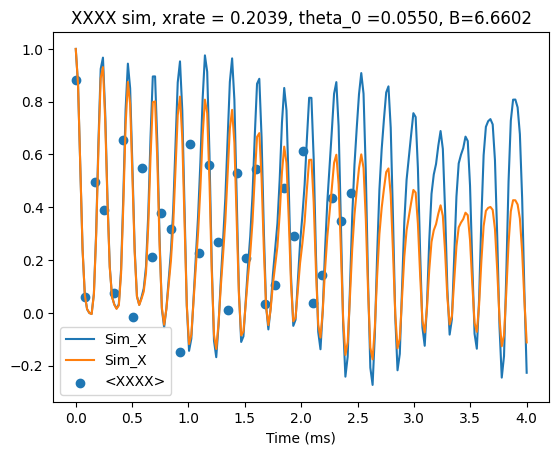

In [160]:
plt.plot(t_list, results_TFIM_XXXX, label='Sim_X')
plt.plot(t_list, results_TFIM_XXXX_noisy, label='Sim_X')

#plt.plot(t_list, resultsTFIM_XXXX_matmult[:,0,0], label='Matmult_X')
plt.scatter(times, expectations_matrix[:,index_experiment[0]], label = '<XXXX>')
#plt.plot(times, expectations_matrix[:,1], label = '<YYYY>')#plt.scatter(times_comb, , label = 'y')
plt.legend()
plt.title('XXXX sim, xrate = {:.4f}, theta_0 ={:.4f}, B={:.4f}'.format(xrate, theta_0_noise, B))
plt.xlabel('Time (ms)')
plt.savefig('data/'+foldername + '/Population_27_chain_4_XY_noise_sim_XXXX{}.png'.format(np.random.randint(1000)))


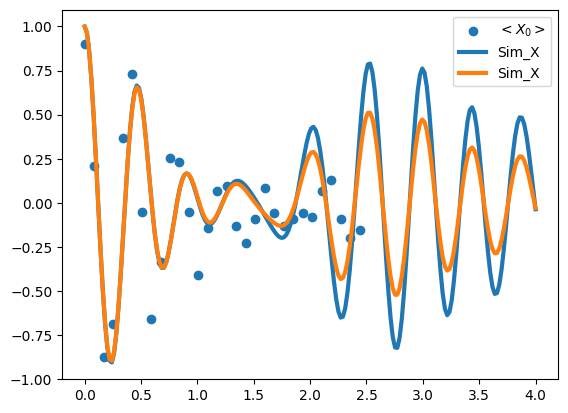

In [161]:
#for i in range(4):
#    plt.scatter(times, qubit_0_magnetization[:,i], label = r'$<X_0>$')
plt.scatter(times, qubit_0_magnetization[:,index_experiment[0]], label = r'$<X_0>$')
    
plt.plot(t_list, results_TFIM_X, label='Sim_X', lw=3)
plt.plot(t_list, results_TFIM_X_noisy, label='Sim_X', lw=3)

#plt.plot(t_list, -1*resultsTFIM_single_x_matmult[:,0,0], label='Matmult_X')
#plt.plot(times_sim, , label='Y')
#get bitstrings for 0000, 1111, and one hamming distance from each:
##Xpops = [sum([measurement_data[i,0][string] for string in all_good_strings]) for i in range(30)]
#Ypops = [sum([measurement_data[i,1][string] for string in all_good_strings]) for i in range(30)]
#Xpops = [measurement_data[i,0]['0000'] + measurement_data[i,0]['1111'] for i in range(30)]
#Ypops = [measurement_data[i,1]['0000'] + measurement_data[i,1]['1111'] for i in range(30)]
#Zpops = [measurement_data[i,2]['0000'] + measurement_data[i,2]['1111'] for i in range(30)]

#plt.plot(times, expectations_matrix[:,1], label = '<YYYY>')#plt.scatter(times_comb, , label = 'y')
plt.legend()
plt.legend()

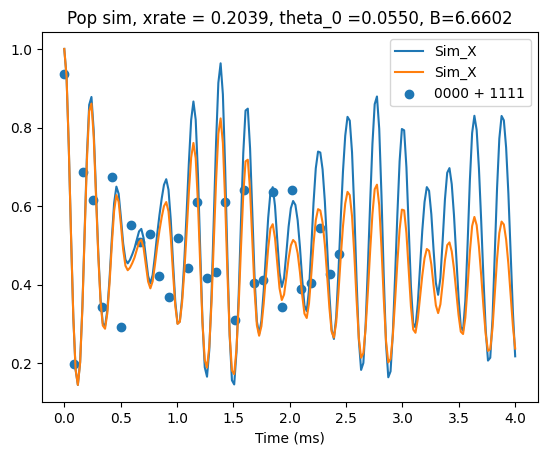

In [162]:
plt.plot(t_list, results_TFIM_polarization, label='Sim_X')
plt.plot(t_list, results_TFIM_polarization_noisy, label='Sim_X')

#plt.plot(t_list, 1-resultsTFIM_polarization_x_matmult[:,0,0], label='Matmult_X')
#plt.plot(times_sim, , label='Y')
#get bitstrings for 0000, 1111, and one hamming distance from each:
##Xpops = [sum([measurement_data[i,0][string] for string in all_good_strings]) for i in range(30)]
#Ypops = [sum([measurement_data[i,1][string] for string in all_good_strings]) for i in range(30)]
#Xpops = [measurement_data[i,0]['0000'] + measurement_data[i,0]['1111'] for i in range(30)]
#Ypops = [measurement_data[i,1]['0000'] + measurement_data[i,1]['1111'] for i in range(30)]
#Zpops = [measurement_data[i,2]['0000'] + measurement_data[i,2]['1111'] for i in range(30)]
plt.scatter(times, Xpops, label = '0000 + 1111')
#plt.plot(times, expectations_matrix[:,1], label = '<YYYY>')#plt.scatter(times_comb, , label = 'y')
plt.legend()

plt.legend()
plt.title('Pop sim, xrate = {:.4f}, theta_0 ={:.4f}, B={:.4f}'.format(xrate, theta_0_noise, B))
plt.xlabel('Time (ms)')
plt.savefig('data/'+foldername + '/Population_27_chain_4_XY_noise_sim_pop_X{}.png'.format(np.random.randint(1000)))

In [163]:
XXXX_comb = np.concatenate((expectations_matrix[:,0], expectations_matrix[:,1]))
YYYY_comb = np.concatenate((expectations_matrix[:,3], expectations_matrix[:,2]))

plt.plot(times_sim, resultsTFIM_XXXX[:,0,0])
plt.plot(times_sim, resultsTFIM_YYYY[:,0,0])
plt.scatter(times_comb, XXXX_comb, label = '<XXXX>')
plt.scatter(times_comb, YYYY_comb, label = '<YYYY>')
plt.legend()

NameError: name 'times_sim' is not defined

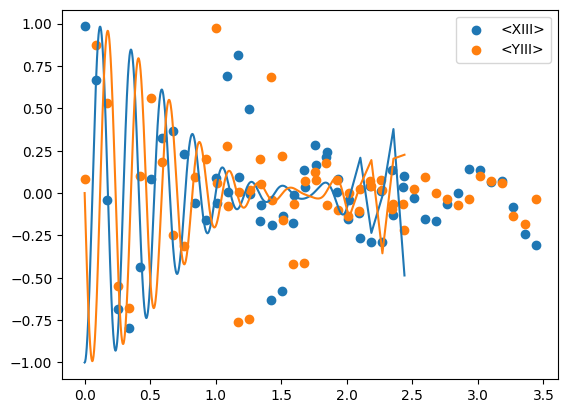

In [ ]:
plt.plot(times_sim, resultsTFIM_single_x[:,0,0])
plt.plot(times_sim, resultsTFIM_single_y[:,0,0])
single_comb_x = np.concatenate((qubit_0_magnetization[:,0], qubit_0_magnetization[:,1]))
single_comb_y = np.concatenate((qubit_0_magnetization[:,3], qubit_0_magnetization[:,2]))
#plt.plot(times_sim, resultsTFIM_YYYY[:,0,0])
plt.scatter(times_comb, single_comb_x, label = '<XIII>')
plt.scatter(times_comb, single_comb_y, label = '<YIII>')
plt.legend()